In [30]:
import os

BBO_exp_dict = {
    "BBO baseline": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01.01_test_hyp_sillywalks_filter_1_baseline/",
    "BBO sillywalks 0": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01.02_test_hyp_sillywalks_filter_0/",
    "BBO sillywalks 0.1": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01.03_test_hyp_sillywalks_filter_0.1/",
    "BBO sillywalks 0.5": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01.04_test_hyp_sillywalks_filter_0.5/",
    "BBO 6-31G(2df,p)": os.environ["DATA"] + "/07_BBO/04_BBO_chem/02.01_test_hyp_631G2dfp/",
    "BBO target -3.5 eV": os.environ["DATA"] + "/07_BBO/04_BBO_chem/03.01_test_hyp_max_gaussian/"
}

EvoMol_exp_dict = {
#     "EvoMol baseline": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01.11_EvoMol_test_hyp_sillywalks_filter_1_baseline/",
    "EvoMol baseline": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01.11_EvoMol_test_hyp_sillywalks_filter_1_baseline_bis_record_time/",
#     "EvoMol sillywalks 0": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01.12_EvoMol_test_hyp_sillywalks_filter_0/",
    "EvoMol sillywalks 0": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01.12_EvoMol_test_hyp_sillywalks_filter_0_bis_record_time/",
    "EvoMol sillywalks 0.1": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01.13_EvoMol_test_hyp_sillywalks_filter_0.1/",
    "EvoMol sillywalks 0.5": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01.14_EvoMol_test_hyp_sillywalks_filter_0.5/",
    "EvoMol 6-31G(2df,p)": os.environ["DATA"] + "/07_BBO/04_BBO_chem/02.11_EvoMol_test_hyp_631G2dfp/",
    "EvoMol target -3.5 eV": os.environ["DATA"] + "/07_BBO/04_BBO_chem/03.11_EvoMol_test_hyp_max_gaussian/"
}

sub_experiments_names = [str(i) for i in range(1, 11)]

output_figures_root = os.environ["FIGURES"] + "/07_BBO/04_BBO_chem/04.01_hyp_results"
os.makedirs(output_figures_root, exist_ok=True)

In [31]:
groups = [
    [
        "Sillywalks study",
        ["BBO baseline", "BBO sillywalks 0.5", "BBO sillywalks 0.1", "BBO sillywalks 0", 
         "EvoMol baseline", "EvoMol sillywalks 0.5", "EvoMol sillywalks 0.1", "EvoMol sillywalks 0"],
        {
            "BBO baseline": "BBO sillywalks 1",
            "EvoMol baseline": "EvoMol sillywalks 1",
        },
        [0, 0, 0, 0, 1, 1, 1, 1],
        [None, None, None, None, None, None, None, None],
        (-9, -2) # y limits
    ],
    [
        "DFT base 3-21G*",
        ["BBO baseline", "EvoMol baseline"],
        {
            "BBO baseline": "BBO 3-21G*",
            "EvoMol baseline": "EvoMol 3-21G*",
        },
        [0, 1],
        [None, None],
        (-6, -2) # y limits
    ],
    [
        "DFT base 6-31G(2df,p)",
        ["BBO 6-31G(2df,p)", "EvoMol 6-31G(2df,p)"],
        {},
        [0, 1],
        [None, None],
        (-6, -2) # y limits
    ],
    [
        "Max HOMO",
        ["BBO baseline", "EvoMol baseline"],
        {
            "BBO baseline": "BBO objective max HOMO",
            "EvoMol baseline": "EvoMol objective max HOMO",
        },
        [0, 1],
        [None, None],
        (-6, -2) # y limits
    ],
    [
        "Target HOMO -3.5 eV",
        ["BBO target -3.5 eV", "EvoMol target -3.5 eV"],
        {},
        [0, 1],
        [None, None],
        (0, 1) # y limits
    ],
    
    
]

In [32]:
from bbomol.postprocessing.postprocessing import load_complete_input_results

results_dict = load_complete_input_results(BBO_exp_dict, EvoMol_exp_dict, sub_experiments_names)


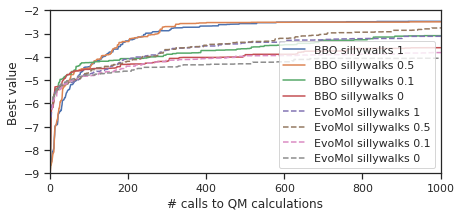

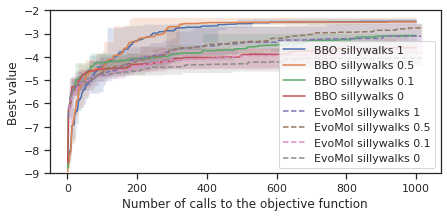

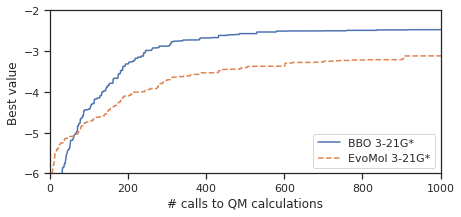

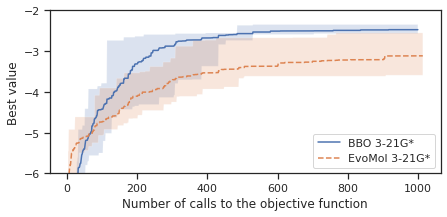

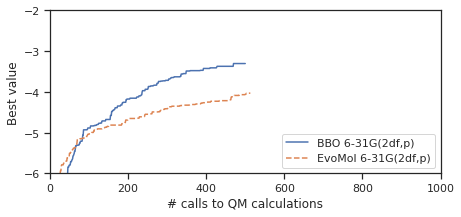

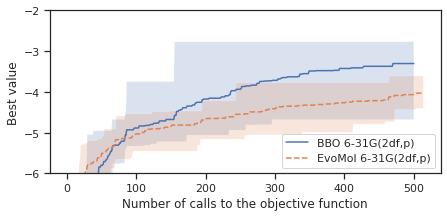

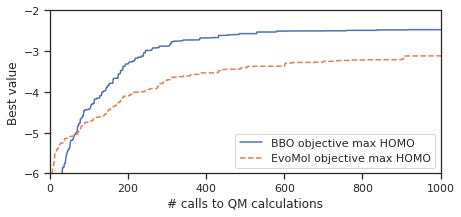

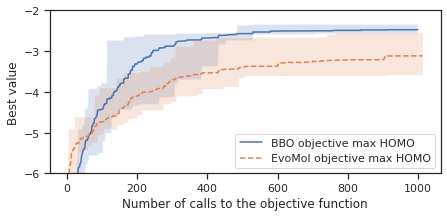

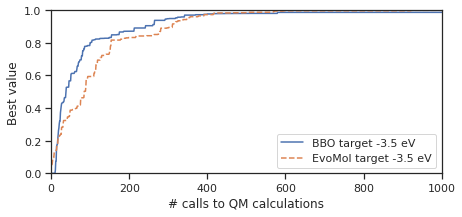

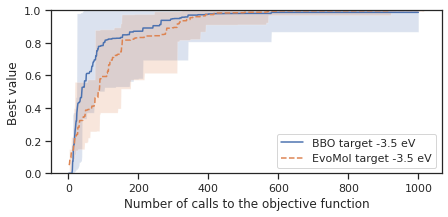

In [4]:
from bbomol.postprocessing import plot
plot.figsize = (7, 3)
from IPython.display import display, HTML


for g in groups:
    
    display(HTML("<h3>" + g[0] +"</h3>"))
    
    plot.plot_best_so_far(results_dict, metric="mean", exp_list_plot=g[1], plot_name=g[0], labels_dict=g[2],
                     classes_dashes=g[3], classes_markers=g[4], ylim=g[5], 
                     xlabel="# calls to QM calculations", xlim=(0, 1000),
                     output_dir_path=output_figures_root)
    
    plot.plot_best_so_far(results_dict, metric="both", exp_list_plot=g[1], plot_name=g[0], labels_dict=g[2],
                     classes_dashes=g[3], classes_markers=g[4], ylim=g[5])

In [5]:
from rdkit.Chem import MolFromSmiles, Lipinski
import numpy as np

def filter_9_atoms(smiles, comput_time):
    mask = np.zeros((len(smiles),), dtype=bool)
    
    for i, smi in enumerate(smiles):
        mask[i] = Lipinski.HeavyAtomCount(MolFromSmiles(smi)) == 9
        
    return list(np.array(smiles)[mask]), list(np.array(comput_time)[mask])

def mol_size_vect(smiles):
    
    mol_size_vect = []
    for smi in smiles:
        mol_size_vect.append(Lipinski.HeavyAtomCount(MolFromSmiles(smi)))
    return mol_size_vect
        

In [6]:
BBO_baseline_SMILES = results_dict["BBO baseline"]["dataset_success_smiles"][0]
BBO_baseline_comput_time = results_dict["BBO baseline"]["dataset_success_success_obj_computation_time"][0]
BBO_baseline_mol_size = mol_size_vect(BBO_baseline_SMILES)
BBO_baseline_SMILES_9at, BBO_baseline_comput_time_9at = filter_9_atoms(BBO_baseline_SMILES, 
                                                                       BBO_baseline_comput_time)

EvoMol_baseline_SMILES = results_dict["EvoMol baseline"]["dataset_success_smiles"][0]
EvoMol_baseline_comput_time = results_dict["EvoMol baseline"]["dataset_success_success_obj_computation_time"][0]
EvoMol_baseline_mol_size = mol_size_vect(EvoMol_baseline_SMILES)
EvoMol_baseline_SMILES_9at, EvoMol_baseline_comput_time_9at = filter_9_atoms(EvoMol_baseline_SMILES, 
                                                                             EvoMol_baseline_comput_time)

BBO_sw0_SMILES = results_dict["BBO sillywalks 0"]["dataset_success_smiles"][0]
BBO_sw0_comput_time = results_dict["BBO sillywalks 0"]["dataset_success_success_obj_computation_time"][0]
BBO_sw0_mol_size = mol_size_vect(BBO_sw0_SMILES)
BBO_sw0_SMILES_9at, BBO_sw0_comput_time_9at = filter_9_atoms(BBO_sw0_SMILES, 
                                                             BBO_sw0_comput_time)

EvoMol_sw0_SMILES = results_dict["EvoMol sillywalks 0"]["dataset_success_smiles"][0]
EvoMol_sw0_comput_time = results_dict["EvoMol sillywalks 0"]["dataset_success_success_obj_computation_time"][0]
EvoMol_sw0_mol_size = mol_size_vect(EvoMol_sw0_SMILES)
EvoMol_sw0_SMILES_9at, EvoMol_sw0_comput_time_9at = filter_9_atoms(EvoMol_sw0_SMILES, 
                                                                   EvoMol_sw0_comput_time)



In [7]:
print(len(BBO_baseline_SMILES_9at))
print(len(BBO_baseline_SMILES))

201
681


In [8]:
print(len(EvoMol_baseline_SMILES_9at))
print(len(EvoMol_baseline_SMILES))

115
722


In [9]:
print(len(BBO_sw0_SMILES_9at))
print(len(BBO_sw0_SMILES))

477
844


In [10]:
print(len(EvoMol_sw0_SMILES_9at))
print(len(EvoMol_sw0_SMILES))

354
898


In [11]:
d = {"size (# heavy atoms)": [], "time (s)": [], "method": [], "sillywalks filter": []}

def add_current_data(d, size_list, time_list, method, sillywalks):
    d["size (# heavy atoms)"].extend(size_list)
    d["time (s)"].extend(time_list)
    d["method"].extend(np.full((len((size_list)),), method))
    d["sillywalks filter"].extend(np.full((len((size_list)),), sillywalks))
    
add_current_data(d, BBO_baseline_mol_size, BBO_baseline_comput_time, "BBO", False)
add_current_data(d, EvoMol_baseline_mol_size, EvoMol_baseline_comput_time, "EvoMol", False)
add_current_data(d, BBO_sw0_mol_size, BBO_sw0_comput_time, "BBO", True)
add_current_data(d, EvoMol_sw0_mol_size, EvoMol_sw0_comput_time, "EvoMol", True)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import pandas as pd

df = pd.DataFrame.from_dict(d)


### Size and time distributions (no filter, all solutions)

<AxesSubplot:xlabel='size (# heavy atoms)', ylabel='Count'>

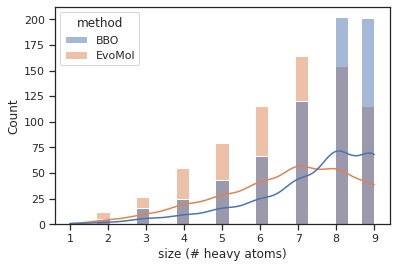

In [13]:
sns.histplot(data=df[df["sillywalks filter"] == False], x="size (# heavy atoms)", kde=True, hue="method")

<AxesSubplot:xlabel='time (s)', ylabel='Count'>

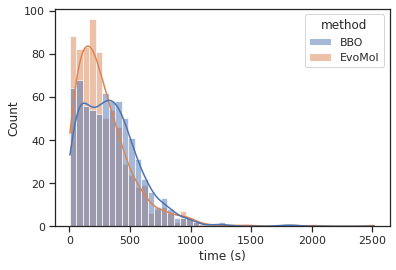

In [14]:
sns.histplot(data=df[df["sillywalks filter"] == False], x="time (s)", kde=True, hue="method")

In [15]:
len(df[np.logical_and(df["sillywalks filter"] == False, df["method"] == "BBO")])

681

In [16]:
len(df[np.logical_and(df["sillywalks filter"] == False, df["method"] == "EvoMol")])

722

### Size and time distributions (sillywalks filter, all solutions)

<AxesSubplot:xlabel='size (# heavy atoms)', ylabel='Count'>

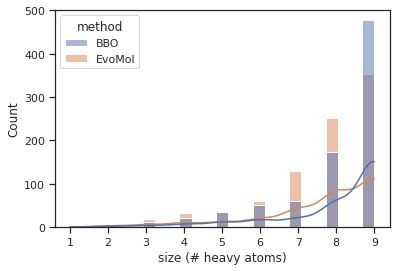

In [17]:
sns.histplot(data=df[df["sillywalks filter"] == True], x="size (# heavy atoms)", kde=True, hue="method")

<AxesSubplot:xlabel='time (s)', ylabel='Count'>

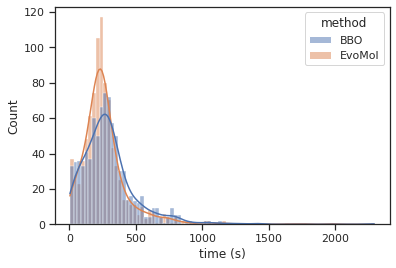

In [18]:
sns.histplot(data=df[df["sillywalks filter"] == True], x="time (s)", kde=True, hue="method")

In [19]:
len(df[np.logical_and(df["sillywalks filter"] == True, df["method"] == "BBO")])

844

In [20]:
len(df[np.logical_and(df["sillywalks filter"] == True, df["method"] == "EvoMol")])

898

### Time distribution (no filter, 9 heavy atoms solutions)

<AxesSubplot:xlabel='time (s)', ylabel='Count'>

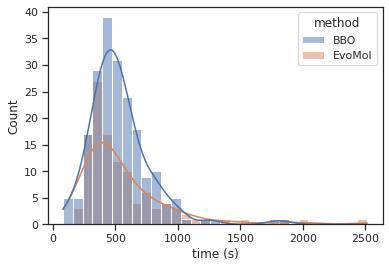

In [21]:
sns.histplot(data=df[np.logical_and(df["sillywalks filter"] == False, df["size (# heavy atoms)"] == 9)], 
             x="time (s)", kde=True, hue="method")

In [22]:
len(df[np.logical_and(np.logical_and(df["sillywalks filter"] == False, df["method"] == "BBO"), 
                      df["size (# heavy atoms)"] == 9)])

201

In [23]:
len(df[np.logical_and(np.logical_and(df["sillywalks filter"] == False, df["method"] == "EvoMol"), 
                      df["size (# heavy atoms)"] == 9)])

115

### Time distribution (sillywalks filter, 9 heavy atoms solutions)

<AxesSubplot:xlabel='time (s)', ylabel='Count'>

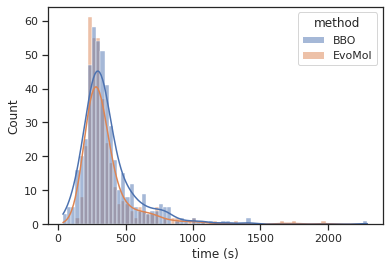

In [24]:
sns.histplot(data=df[np.logical_and(df["sillywalks filter"] == True, df["size (# heavy atoms)"] == 9)], 
             x="time (s)", kde=True, hue="method")

In [25]:
len(df[np.logical_and(np.logical_and(df["sillywalks filter"] == True, df["method"] == "BBO"), 
                      df["size (# heavy atoms)"] == 9)])

477

In [26]:
len(df[np.logical_and(np.logical_and(df["sillywalks filter"] == True, df["method"] == "EvoMol"), 
                      df["size (# heavy atoms)"] == 9)])

354